# REGRESIÓN MÚLTIPLE

Se debe realizar el modelo de producción Cobb-Douglas.

Estadísticos descriptivos: coef. de variación (CV), coef. de asimetría (CA), Jarque-Bera (JB)

Correlacion positiva: X+, Y+
Correlación negativa: X+, Y-

In [8]:
import math #operaciones matemáticas
import numpy as np #gestión numérica
import pandas as pd #estructuras de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
from sklearn.linear_model import LinearRegression #regresión lineal
lr = LinearRegression()

## Paso 0: Obtención de datos.

### Carga de datos:

Para el ejemplo del TALLER 2, se seleccionaron todos los datos.

In [9]:
datos = "datos_regresion_full_send.csv" #archivo con los datos
db = pd.read_csv(datos, sep=';') #we're in
db.head() #vista previa de los datos

,VENTAS,PRECIO,P_COMP,GASTOS_PB,INGRESOS
0,36,12,12,284,626
1,48,9,10,320,713
2,45,11,12,314,574
3,40,13,15,299,557
4,30,15,14,280,609


In [10]:
#unidades de variable INGRESO dadas en miles de pesos
unidad = 1000 #miles
nombre_unidad = 'pesos' #de pesos

## Paso 1: Estadística descriptiva univariada.

### Exploración de los datos:

In [11]:
db.describe() #estadísticas de variables cuantitativas

,VENTAS,PRECIO,P_COMP,GASTOS_PB,INGRESOS
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,52.583333,10.583333,12.083333,330.833333,743.833333
std,12.298948,1.907094,1.331390,31.048986,121.647472
min,30.000000,8.000000,10.000000,280.000000,557.000000
25%,43.750000,9.000000,11.000000,310.250000,621.750000
50%,54.500000,10.000000,12.000000,335.500000,757.000000
75%,63.500000,11.250000,12.250000,352.000000,861.000000
max,68.000000,15.000000,15.000000,372.000000,882.000000


Con este resumen estadístico podemos realizar un pequeño analisis del comportamiento de las variables:

VENTAS: La media (52.58) es menor a la mediana (54.50) ==> la dist. tiende a la izquierda.
-rango: (68 - 30) ==> 38 mill.
-std: En promedio los valores de las ventas se alejan o desvían 12.29 mill. de la media.

PRECIO: La media (10.58) es mayor a la mediana (10.00) ==> la dist. tiende a la derecha.
-rango: (15 - 8) ==> 7 mil.
-std: En promedio los valores del precio se alejan o desvían 1.9 mil de la media.

P_COMP: La media (12.08) es mayor a la mediana (12.00) ==> la dist. tiende a la derecha.
-rango: (15 -10) ==> 5 mil.
-std: En promedio los valores del precio de compra se alejan o desvían 1.33 mil de la media.

GASTOS_PB: La media (330.83) es menor a la mediana (335.50) ==> la dist. tiende a la izquierda.
-rango: (352 - 280) ==> 72 mil.
-std: En promedio los valores de gastos en publicidad se alejan o desvían 31.04 mil de la media.

INGRESOS: La media (743.83) es menor a la mediana (757.00) ==> la dist. tiende a la izquierda.
-rango: (882 - 557) ==> 325 mil.
-std: En promedio los valores de gastos en publicidad se alejan o desvían 121.64 mil de la media.


Text(0.5, 1.0, 'Boxplot Ingresos')

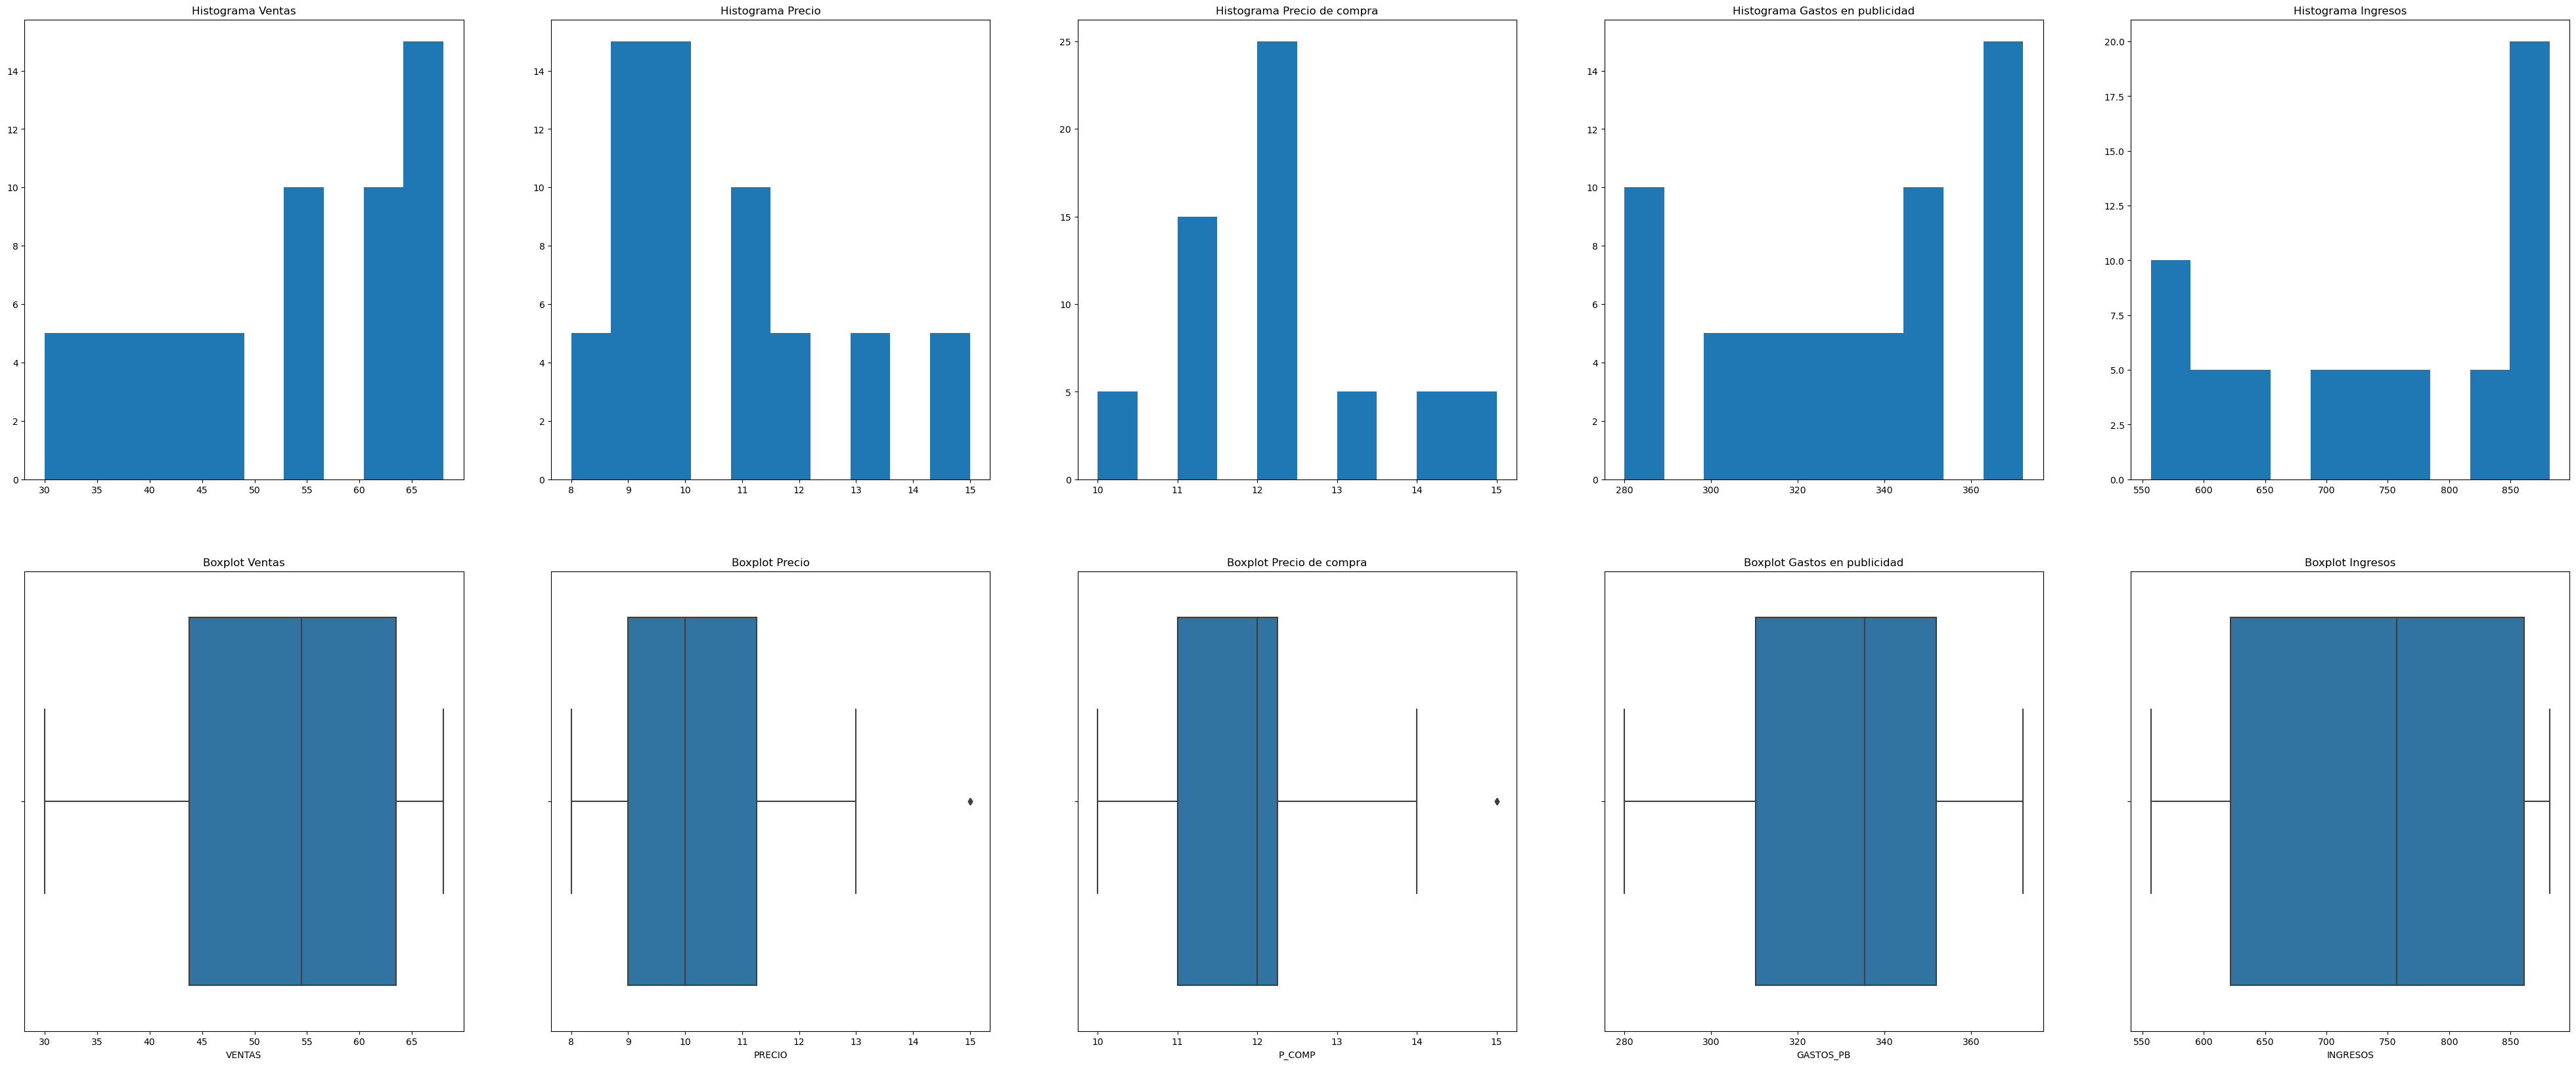

In [12]:
#visualización de cada variable en histogramas y boxplots

plt.figure(figsize=(50, 20))

#histograma ventas
plt.subplot(2,5,1)
plt.hist(db['VENTAS'])
plt.title('Histograma Ventas')

#histograma precio
plt.subplot(2,5,2)
plt.hist(db['PRECIO'])
plt.title('Histograma Precio')

#histograma p_comp
plt.subplot(2,5,3)
plt.hist(db['P_COMP'])
plt.title('Histograma Precio de compra')

#histograma gastos_pb
plt.subplot(2,5,4)
plt.hist(db['GASTOS_PB'])
plt.title('Histograma Gastos en publicidad')

#histograma ingresos
plt.subplot(2,5,5)
plt.hist(db['INGRESOS'])
plt.title('Histograma Ingresos')

#boxplot ventas
plt.subplot(2,5,6)
sns.boxplot(x = db["VENTAS"]).set_title("Boxplot Ventas")

#boxplot precio
plt.subplot(2,5,7)
sns.boxplot(x = db["PRECIO"]).set_title("Boxplot Precio")

#boxplot p_comp
plt.subplot(2,5,8)
sns.boxplot(x = db["P_COMP"]).set_title("Boxplot Precio de compra")

#boxplot gastos_pb
plt.subplot(2,5,9)
sns.boxplot(x = db["GASTOS_PB"]).set_title("Boxplot Gastos en publicidad")

#boxplot ingresos
plt.subplot(2,5,10)
sns.boxplot(x = db["INGRESOS"]).set_title("Boxplot Ingresos")

Con estos gráficos podemos realizar el siguiente análisis:

Todas las distribuciones son unimodales, excepto las de gastos en publicidad e ingresos, esas son bimodales.

Las distribuciones de precio y precio de compra tienen valores atípicos en 15 mil. Atípicamente habrán precios de 15 mil.

### Cálculo de coeficiente de variación (CV):

In [13]:
ventas = db['VENTAS']
precio = db['PRECIO']
p_comp = db['P_COMP']
gastos_pb = db['GASTOS_PB']
ingresos = db['INGRESOS']

#cálculo coeficientes de variación
cv = lambda x: np.std(x, ddof = 1 ) / np.mean(x) * 100
calculo_cv = input('Ingrese la variable: 1 = {}; 2 = {}; 3 = {}; 4 = {}; 5 = {}'.format(db.columns[0],
                                                                                        db.columns[1],
                                                                                        db.columns[2],
                                                                                        db.columns[3],
                                                                                        db.columns[4]))

#interpretación coeficientes de variación
if calculo_cv == '1':
    cv = cv(ventas)
    name = db.columns[0]
    print('Coeficiente de variación: {} (x) = {:.2f}%'.format(name, cv))
elif calculo_cv == '2':
    cv = cv(precio)
    name = db.columns[1]
    print('Coeficiente de variación: {} (x) = {:.2f}%'.format(name, cv))
elif calculo_cv == '3':
    cv = cv(p_comp)
    name = db.columns[2]
    print('Coeficiente de variación: {} (x) = {:.2f}%'.format(name, cv))
elif calculo_cv == '4':
    cv = cv(gastos_pb)
    name = db.columns[3]
    print('Coeficiente de variación: {} (x) = {:.2f}%'.format(name, cv))
elif calculo_cv == '5':
    cv = cv(ingresos)
    name = db.columns[4]
    print('Coeficiente de variación: {} (x) = {:.2f}%'.format(name, cv))

if cv <= 30:
   print('Los valores de la variable {} son homogéneos.\nMUESTRA REPRESENTATIVA.'.format(name))
elif cv > 30 and cv < 50:
   print('Los valores de la variable {} son un poco heterogéneos.\nMUESTRA POCO REPRESENTATIVA.'.format(name))
elif cv > 50:
   print('Los valores de la variable {} son muy heterógeneos.\nMUESTRA NO REPRESENTATIVA.'.format(name))

Coeficiente de variación: VENTAS (x) = 23.39%
Los valores de la variable VENTAS son homogéneos.
MUESTRA REPRESENTATIVA.


## Paso 2: Búsqueda de correlaciones.

En este caso intentaremos predecir los INGRESOS (Y) de la compañía, dados las VENTAS (X1) y los GASTOS_PB (X2).

In [14]:
#búsqueda de correlaciones dada la variable INGRESO
print(db.corr()['VENTAS']) #correlaciones entre Y y X's

VENTAS       1.000000
PRECIO      -0.834923
P_COMP      -0.463631
GASTOS_PB    0.983378
INGRESOS     0.863647
Name: VENTAS, dtype: float64


Con un mapa de calor se pueden observar las correlaciones entre todas las variables. 

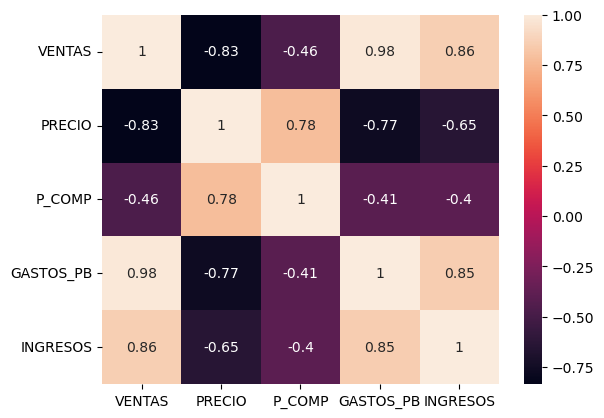

In [15]:
sns.heatmap(db.corr(), annot = True)
plt.show()

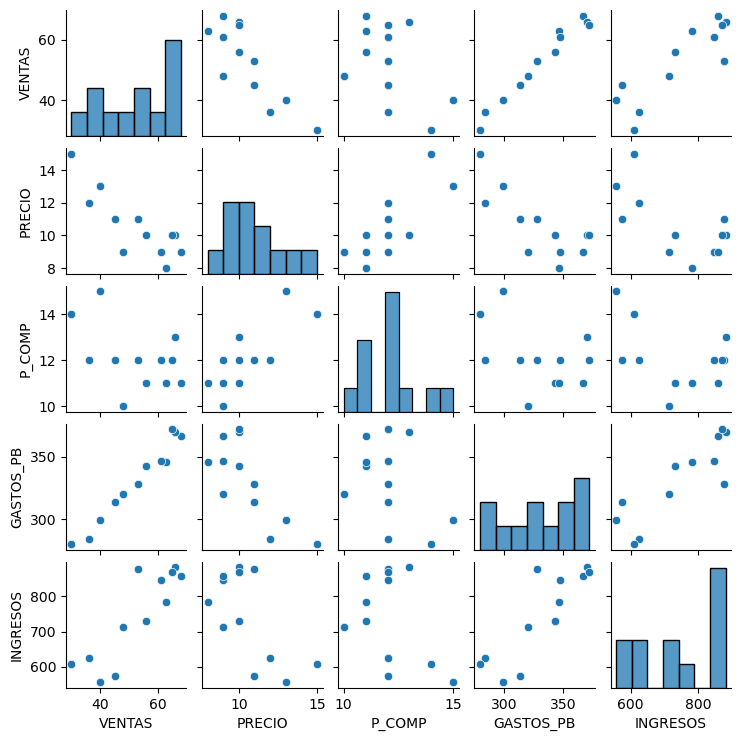

In [16]:
sns.pairplot(data = db, height = 1.5)

Para la interpretación de correlaciones:

Si es positivo, hay una relación directamente proporcional (+ +).
Si es negativo, hay una relación indirectamente proporcional (- +).

## Paso 3: Modelar los datos.

In [17]:
#db_reg = db[['VENTAS', 'PRECIO', 'P_COMP', 'GASTOS_PB', 'INGRESOS']]
db_reg = db.copy() #realizo una copia de los datos para no alterar la db original

def ln(x): #creación de valores ln para cada columna
    return math.log(x)

db_reg['VENTAS_ln'] = db_reg['VENTAS'].apply(ln)
db_reg['PRECIO_ln'] = db_reg['PRECIO'].apply(ln)
db_reg['P_COMP_ln'] = db_reg['P_COMP'].apply(ln)
db_reg['GASTOS_PB_ln'] = db_reg['GASTOS_PB'].apply(ln)
db_reg['INGRESOS_ln'] = db_reg['INGRESOS'].apply(ln)

In [18]:
db_reg.columns

Index(['VENTAS', 'PRECIO', 'P_COMP', 'GASTOS_PB', 'INGRESOS', 'VENTAS_ln',
       'PRECIO_ln', 'P_COMP_ln', 'GASTOS_PB_ln', 'INGRESOS_ln'],
      dtype='object')

In [24]:
#nespecificando las variables de la regresión
X = db_reg.loc[:, ['PRECIO',
                   'P_COMP',
                   'GASTOS_PB',
                   'INGRESOS']].values #variables independientes (Xn)

Y = db_reg.loc[:, ['VENTAS']].values #variable dependiente (Y)

X_log = db_reg.loc[:, ['PRECIO_ln',
                       'P_COMP_ln',
                       'GASTOS_PB_ln',
                       'INGRESOS_ln']].values #variables independientes alt_log (Xn)

Y_log = db_reg.loc[:, ['VENTAS_ln']].values #variable dependiente alt_log (Y)

## Paso 4: Análisis de R^2.

In [25]:
#mejor R2
R2s = []

#R2_lineal
lr.fit(X, Y)
R2_lineal = lr.score(X, Y)
R2s.append((R2_lineal, 'LINEAL'))

#R2_log
lr.fit(X_log, Y)
R2_lineal = lr.score(X_log, Y)
R2s.append((R2_lineal, 'LOGARÍTMICA'))

#R2_exp
lr.fit(X, Y_log)
R2_lineal = lr.score(X, Y_log)
R2s.append((R2_lineal, 'EXPONENCIAL'))

#R2_pot
lr.fit(X_log, Y_log)
R2_lineal = lr.score(X_log, Y_log)
R2s.append((R2_lineal, 'POTENCIAL'))

for r2 in R2s:
    print(r2)

max_R2 = max(R2s, key=lambda x: x[0]) #recomendación para modelo
print('\nRECOMENDACIÓN: El mejor R2 ({:.2f}) lo arroja una regresión: {}.'.format(max_R2[0],
                                                                                  max_R2[1]))

(0.9908826770126453, 'LINEAL')
(0.9912102444910261, 'LOGARÍTMICA')
(0.9883762787933105, 'EXPONENCIAL')
(0.9864944718814224, 'POTENCIAL')

RECOMENDACIÓN: El mejor R2 (0.99) lo arroja una regresión: LOGARÍTMICA.


## Paso 3: Elección, estimación e interpretación del modelo.

In [26]:
print(lr.fit(X, Y))
print(lr.score(X, Y)) #R^2
print(lr.coef_) #pendientes de cada variable
print(lr.intercept_) #intercepto de la recta de regresión con Y

LinearRegression()
0.9908826770126453
[[-2.24082898  1.2060671   0.2629912   0.01269157]]
[-34.72120351]


Si negativo, ventas aumentan y visceversa.

In [22]:
#elección del modelo
modelo = input ('Escoja un modelo: 1 = Lineal; 2 = Logarítmico; 3 = Exponencial; 4 = Potencial: ')

#modelo lineal
if modelo == '1':
    lr.fit(X, Y)
    R2 = lr.score(X, Y)
    print('REGRESIÓN LINEAL:')
    print('\nR^2 = {:.2f}'.format(R2))
    a = lr.intercept_
    b = lr.coef_
    #interpretación lineal
    print('\nA = {:.2f}'.format(a[0]))
    print('Si las variables independientes permanecen constantes, {} es igual a {:.2f} {}.'.format(db_reg.columns[4],
                                                                                                   a[0] * unidad,
                                                                                                   nombre_unidad))
    print('\nB1 = {:.5f}'.format(b[0][0]))
    print('Por un incremento de {:.2f} {} en {}, los {} aumentan en {:.5f} {}.'.format(unidad,
                                                                                     nombre_unidad,
                                                                                     db_reg.columns[0],
                                                                                     db_reg.columns[4],
                                                                                     b[0][0] * unidad,
                                                                                     nombre_unidad))
    print('\nB2 = {:.5f}'.format(b[0][1]))
    print('Por un incremento de {:.2f} {} en {}, los {} aumentan en {:.5f} {}.'.format(unidad,
                                                                                     nombre_unidad,
                                                                                     db_reg.columns[1],
                                                                                     db_reg.columns[4],
                                                                                     b[0][1] * unidad,
                                                                                     nombre_unidad))
    print('\nB3 = {:.5f}'.format(b[0][2]))
    print('Por un incremento de {:.2f} {} en {}, los {} disminuyen en {:.5f} {}.'.format(unidad,
                                                                                     nombre_unidad,
                                                                                     db_reg.columns[2],
                                                                                     db_reg.columns[4],
                                                                                     b[0][2] * unidad,
                                                                                     nombre_unidad))
    print('\nB4 = {:.5f}'.format(b[0][3]))
    print('Por un incremento de {:.2f} {} en {}, los {} disminuyen en {:.5f} {}.'.format(unidad,
                                                                                     nombre_unidad,
                                                                                     db_reg.columns[3],
                                                                                     db_reg.columns[4],
                                                                                     b[0][3] * unidad,
                                                                                     nombre_unidad))
    
    print('\nECUACIÓN: Y = {:.2f} + {:.5f}(X1) + {:.5f}(X2) + {:.5f}(X3) + {:.5f}(X4)'.format(a[0],
                                                                                              b[0][0],
                                                                                              b[0][1],
                                                                                              b[0][2],
                                                                                              b[0][3]))
    print('\nY-ESTIMADA:')
    #estimación lineal
    y_pred = lr.predict(X)
    print(y_pred[0:5]) #primeros 5 valores estimados

if modelo == '2':
    lr.fit(X_log, Y)
    R2 = lr.score(X_log, Y)
    print('REGRESIÓN LOGARÍTMICA:')
    print('\nR^2 = {:.2f}'.format(R2))
    a = lr.intercept_
    b = lr.coef_
    #interpretación log
    print('\nA = {:.2f}'.format(a[0]))
    print('Si las variables independientes permanecen constantes, {} es igual a {:.2f} {}.'.format(db_reg.columns[4],
                                                                                                   a[0] * unidad,
                                                                                                   nombre_unidad))
    print('\nB1 = {:.5f}'.format(b[0][0]))
    print('Por un incremento del 1% en {}, los {} aumentan en {:.5f} {}.'.format(db_reg.columns[0],
                                                                                 db_reg.columns[4],
                                                                                 b[0][0] * unidad,
                                                                                 nombre_unidad))
    print('\nB2 = {:.5f}'.format(b[0][1]))
    print('Por un incremento del 1% en {}, los {} aumentan en {:.5f} {}.'.format(db_reg.columns[1],
                                                                                 db_reg.columns[4],
                                                                                 b[0][1] * unidad,
                                                                                 nombre_unidad))
    print('\nB3 = {:.5f}'.format(b[0][2]))
    print('Por un incremento del 1% en {}, los {} disminuyen en {:.5f} {}.'.format(db_reg.columns[2],
                                                                                 db_reg.columns[4],
                                                                                 b[0][2] * unidad,
                                                                                 nombre_unidad))
    print('\nB4 = {:.5f}'.format(b[0][3]))
    print('Por un incremento del 1% en {}, los {} disminuyen en {:.5f} {}.'.format(db_reg.columns[3],
                                                                                 db_reg.columns[4],
                                                                                 b[0][3] * unidad,
                                                                                 nombre_unidad))
    print('\nECUACIÓN: Y = {:.2f} + {:.5f}(LnX1) + {:.5f}(LnX2) + {:.5f}(LnX3) + {:.5f}(LnX4)'.format(a[0],
                                                                                                      b[0][0],
                                                                                                      b[0][1],
                                                                                                      b[0][2],
                                                                                                      b[0][3]))
    #estimación log
    print('\nY-ESTIMADA:')
    y_pred = lr.predict(X)
    print(y_pred[0:5]) #primeros 5 valores estimados

if modelo == '3':
    lr.fit(X, Y_log)
    R2 = lr.score(X, Y_log)
    print('REGRESIÓN EXPONENCIAL:')
    print('\nR^2 = {:.2f}'.format(R2))
    a = lr.intercept_
    b = lr.coef_
    #interpretación exp
    print('\nA = {:.2f}'.format(a[0]))
    print('Si las variables independientes permanecen constantes, {} es igual a {:.2f} {}.'.format(db_reg.columns[4],
                                                                                                   a[0] * unidad,
                                                                                                   nombre_unidad))
    print('\nB1 = {:.5f}'.format(b[0][0]))
    print('Por un incremento de {:.2f} {} en {}, los {} aumentan en {:.5f} {}.'.format(unidad,
                                                                                       nombre_unidad,
                                                                                       db_reg.columns[0],
                                                                                       db_reg.columns[4],
                                                                                       b[0][0] * unidad,
                                                                                       nombre_unidad))
    print('\nB2 = {:.5f}'.format(b[0][1]))
    print('Por un incremento de {:.2f} {} en {}, los {} aumentan en {:.5f} {}.'.format(unidad,
                                                                                       nombre_unidad,
                                                                                       db_reg.columns[1],
                                                                                       db_reg.columns[4],
                                                                                       b[0][1] * unidad,
                                                                                       nombre_unidad))
    print('\nB3 = {:.5f}'.format(b[0][2]))
    print('Por un incremento de {:.2f} {} en {}, los {} aumentan en {:.5f} {}.'.format(unidad,
                                                                                       nombre_unidad,
                                                                                       db_reg.columns[2],
                                                                                       db_reg.columns[4],
                                                                                       b[0][2] * unidad,
                                                                                       nombre_unidad))
    print('\nB4 = {:.5f}'.format(b[0][3]))
    print('Por un incremento de {:.2f} {} en {}, los {} aumentan en {:.5f} {}.'.format(unidad,
                                                                                       nombre_unidad,
                                                                                       db_reg.columns[3],
                                                                                       db_reg.columns[4],
                                                                                       b[0][3] * unidad,
                                                                                       nombre_unidad))
    print('\nECUACIÓN: Y = Ln[e^{:.2f} * e^[{:.7f}(X1) + {:.7f}(X2) + {:.7f}(X3) + {:.7f}(X4)]]'.format(a[0],
                                                                                              b[0][0],
                                                                                              b[0][1],
                                                                                              b[0][2],
                                                                                              b[0][3]))
    #estimación exp
    print('\nY-ESTIMADA:')
    y_pred = lr.predict(X)
    print(y_pred[0:5]) #primeros 5 valores estimados

#    if modelo == '4':
#        #elección_ingreso/consumo_pot
#        ingreso_consumo_pot = lr.fit(X_log, y_consumo_log)
#        R2_consumo_pot = lr.score(X_log, y_consumo_log)
#        print('REGRESIÓN POTENCIAL: {} / {}.'.format(nombre_x.lower(),
#                                                  nombre_y.lower()))
#        print('\nR^2 = {:.2f}'.format(R2_consumo_pot))
#        a_pot = lr.intercept_
#        b_pot = lr.coef_
#        print('\nA = {:.2f}'.format(a_pot[0]))
#        print('\nB = {:.5f}'.format(b_pot[0][0]))
#        #interpretación_ingreso/consumo_pot
#        print('Por un incremento del 1% en {}, el {} aumenta en {:.2f}%.'.format(nombre_x.lower(),
#                                                                                     nombre_y.lower(),
#                                                                                     b_pot[0][0] * 100))
#        print('\nECUACIÓN: Y = Ln[e^{:.2f} * X^({:.7f}LnX)]'.format(a_pot[0],b_pot[0][0]))
#        #estimación_ingreso/consumo_pot
#        print('\nY-ESTIMADA:')
#        y_pred = lr.predict(X)
#        print(y_pred[0:5]) #primeros 5 valores estimados

REGRESIÓN LINEAL:

R^2 = 0.99

A = -34.72
Si las variables independientes permanecen constantes, INGRESOS es igual a -34721.20 pesos.

B1 = -2.24083
Por un incremento de 1000.00 pesos en VENTAS, los INGRESOS aumentan en -2240.82898 pesos.

B2 = 1.20607
Por un incremento de 1000.00 pesos en PRECIO, los INGRESOS aumentan en 1206.06710 pesos.

B3 = 0.26299
Por un incremento de 1000.00 pesos en P_COMP, los INGRESOS disminuyen en 262.99120 pesos.

B4 = 0.01269
Por un incremento de 1000.00 pesos en GASTOS_PB, los INGRESOS disminuyen en 12.69157 pesos.

ECUACIÓN: Y = -34.72 + -2.24083(X1) + 1.20607(X2) + 0.26299(X3) + 0.01269(X4)

Y-ESTIMADA:
[[35.4960758 ]
 [50.3782781 ]
 [44.96667914]
 [39.94259786]
 [29.91800161]]


## Paso 4: Pronóstico.

In [23]:
def estimar_valor_lineal():
    print('PRONÓSTICO PARA REGRESIÓN LINEAL:\n')

    x1, x2, x3, x4 = [float(x) for x in input('Ingrese valores para las variables independientes separados por comas (,): ').split(',')]
    y_estimado = a[0] + ((b[0][0] * x1)) + ((b[0][1] * x2)) + ((b[0][2] * x3)) + ((b[0][3] * x4))

    print('Con:\n')
    print('{} = {:.2f}'.format(db_reg.columns[0], x1))
    print('{} = {:.2f}'.format(db_reg.columns[1], x2))
    print('{} = {:.2f}'.format(db_reg.columns[2], x3))
    print('{} = {:.2f}\n'.format(db_reg.columns[3], x4))

    print(y_estimado)

#x.append(x_estimado)
#y.append(y_estimado)
#print('Se estima que por cada ${:.2f} {} en el {}, haya un {} de ${:.2f} {}.'.format(x_estimado,
#                                                                                                 nombre_unidad,
#                                                                                                 nombre_x.lower(),
#                                                                                                 nombre_y.lower(),
#                                                                                                 y_estimado * 1000,
#                                                                                                 nombre_unidad))

def estimar_valor_log():
    print('PRONÓSTICO PARA REGRESIÓN LOGARÍTMICA:\n')

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (b_log[0][0] * math.log(x_estimado)) + a_log[0]
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada ${:.2f} {} en el {}, haya un {} de ${:.2f} {}.'.format(x_estimado,
                                                                                                 nombre_unidad,
                                                                                                 nombre_x.lower(),
                                                                                                 nombre_y.lower(),
                                                                                                 y_estimado * 1000,
                                                                                                 nombre_unidad))

def estimar_valor_exp():
    print('PRONÓSTICO PARA REGRESIÓN EXPONENCIAL:\n')

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = a_exp[0] + (x_estimado * b_exp[0][0])
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada ${:.2f} {} en el {}, haya un {} de ${:.2f} {}.'.format(x_estimado,
                                                                                                 nombre_unidad,
                                                                                                 nombre_x.lower(),
                                                                                                 nombre_y.lower(),
                                                                                                 y_estimado * 1000,
                                                                                                 nombre_unidad))

def estimar_valor_pot():
    print('PRONÓSTICO PARA REGRESIÓN POTENCIAL:\n')

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (math.e ** a_pot[0]) * (x_estimado ** b_pot[0][0])
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada ${:.2f} {} en el {}, haya un {} de ${:.2f} {}.'.format(x_estimado,
                                                                                                 nombre_unidad,
                                                                                                 nombre_x.lower(),
                                                                                                 nombre_y.lower(),
                                                                                                 y_estimado * 1000,
                                                                                                 nombre_unidad))

if modelo == '1':
    estimar_valor_lineal()
elif modelo == '2':
    estimar_valor_log()
elif modelo == '3':
    estimar_valor_exp()
elif modelo == '4':
    estimar_valor_pot()

PRONÓSTICO PARA REGRESIÓN LINEAL:



ValueError: not enough values to unpack (expected 4, got 1)

In [ ]:
###---TEST---###

#fit_lin = np.polyfit(x, y, 1) #parámetros para lineal
#print('LINEAL: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.\n'.format(fit_lin[0], fit_lin[1]))
#
#fit_log = np.polyfit(x_log, y, 1) #parámetros para logarítmica
#print('LOGARÍTMICA: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.\n'.format(fit_log[0], fit_log[1]))
#
#fit_exp = np.polyfit(x, y_log, 1) #parámetros para exponencial
#print('EXPONENCIAL: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.\n'.format(fit_exp[0], fit_exp[1]))
#
#fit_pot = np.polyfit(x_log, y_log, 1) #parámetros para potencial
#print('POTENCIAL: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.'.format(fit_pot[0], fit_pot[1]))